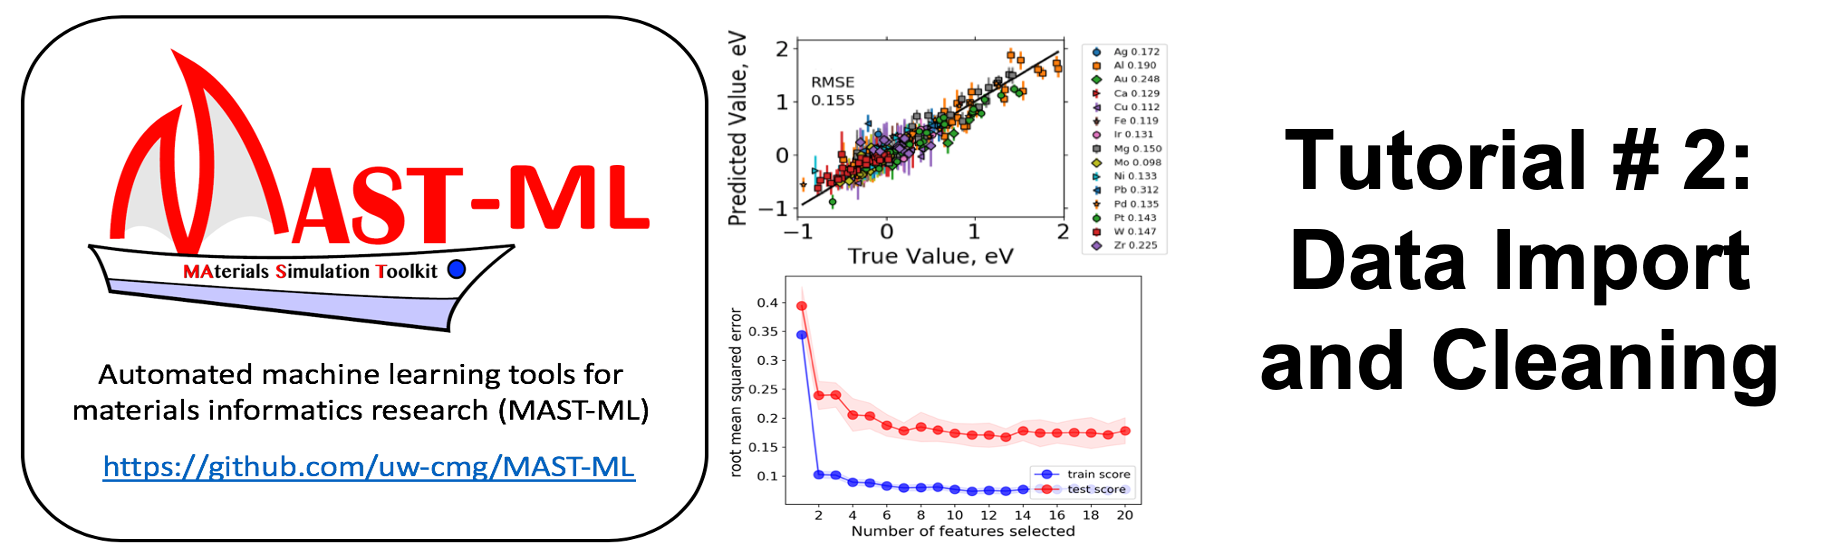

# Welcome to the second MAST-ML tutorial notebook, 

# Data Import and Data Cleaning with MAST-ML! 

## In this notebook, we will learn different ways to download and import data into a MAST-ML run: 

1. [Set up MAST-ML on Colab and begin session](#task1)
2. [Import model datasets from scikit-learn](#task2)
3. [Conduct different data cleaning methods](#task3)
4. [Import and prepare a real dataset that is stored locally](#task4)
5. [Download data from various materials databases](#task5)


## Task 1: Set up MAST-ML on Colab and begin session <a name="task1"></a>

If you are working on Google Colab and need to install MAST-ML, 
begin by pip installing MAST-ML to the Colab session
and install the needed dependencies:

In [ ]:
!pip install mastml

Sync your Google drive to Colab so that we can save MAST-ML results to our Google
Drive. If we save to the Colab session, the data will be deleted when the session 
ends.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Here we import the MAST-ML modules used in this tutorial

In [1]:
from mastml.mastml import Mastml
from mastml.datasets import SklearnDatasets, LocalDatasets, MatminerDatasets,
from mastml.data_cleaning import DataCleaning
import numpy as np
from copy import copy
import mastml
import os 
try:
    data_path = os.path.join(mastml.__path__._path[0], 'data')
except:
    data_path = os.path.join(mastml.__path__[0], 'data')

Figshare is an optional dependency. To import data from figshare, manually install figshare via git clone of git clone https://github.com/cognoma/figshare.git
forestci is an optional dependency. To install latest forestci compatabilty with scikit-learn>=0.24, run pip install git+git://github.com/scikit-learn-contrib/forest-confidence-interval.git


Here, we set the name of the savepath to save MAST-ML results to, and initialize
our MAST-ML run

When the above command is run, a new folder with the name designated SAVEPATH is created.
This is where all of the output for the current MAST-ML run will be saved to.
Note that you can perform multiple runs with the same folder name, and the current datetime
will be appended to the name so that no data is lost or overwritten.

In [2]:
SAVEPATH = 'drive/MyDrive/MASTML_tutorial_2_DataImport'

mastml_instance = Mastml(savepath=SAVEPATH)
savepath = mastml_instance.get_savepath

## Task 2: Import model datasets from scikit-learn <a name="task2"></a>

Let's begin by first showing how to load some common model datasets that
come with the scikit-learn package. As in the first tutorial, we use the SklearnDatasets module 
to load in the data. There are a few regression datasets that come with scikit-learn, such as
the California housing data, the diabetes dataset, and the Friedman data set. For now,
let's once again load in the California housing dataset.

In [3]:
X, y = SklearnDatasets(as_frame=True).load_housing()

Let's quickly examine the X data so we know what we're dealing with:

In [4]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


## Task 3: Conduct different data cleaning method <a name="task3"></a>

We have 20640 data points (houses) and 8 columns (features). From inspecting the dataset,
we can see there are no missing values in the dataset. However, many datasets in the real
world aren't this neat and tidy, and may contain values that are missing. To illustrate
how we can go about cleaning our data, let's make the first few rows of values in the HouseAge
column not-a-number (NaN), which is what they will be if you import a dataset with missing values:

In [5]:
X['HouseAge'][0:4] = np.nan
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,NaN,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,NaN,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,NaN,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,NaN,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


We can now see that the first four rows of the 'HouseAge' column are NaN instead
of their original values. Let's clean the data using a few different methods
in the DataCleaning class. First, let's copy the X data so we can more easily
see the changes we make to each dataset

In [6]:
X1row = X1col = X2 = X3 = X4 = copy(X)

There are few different ways we can clean the data: (1) we can simply 
remove the data points that have missing values, (2) we can perform
data imputation to replace the missing values with the mean (or median) value

Let's start with simply removing the problematic data points:

In [7]:
X1row, y1 = DataCleaning().remove(X=X1row, 
                                  y=y, 
                                  axis=0)
X1row

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


What we can see is that we now have 20636 rows instead of the original 20640. 
The four data points that had missing values in the HouseAge column have been removed.

Note that we could have instead removed the column (feature) containing
the missing values, as in our case all of the missing values were part of
a single feature:

In [8]:
X1col, y1 = DataCleaning().remove(X=X1col, 
                                  y=y, 
                                  axis=1)
X1col

,MedInc,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...
20635,1.5603,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,5.329513,1.171920,741.0,2.123209,39.43,-121.32


What we can see is that we now have all 20640 of our original data points,  
but we now just have 7 of the 8 features as the HouseAge feature has been removed.

There are smarter things we can do besides simply removing the problematic
data points. Here, let's use the imputation process to replace the missing
values with the mean value of the feature column

In [9]:
X2, y2 = DataCleaning().imputation(X=X2, 
                                   y=y, 
                                   strategy='mean')
X2

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,28.636994,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,28.636994,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,28.636994,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,28.636994,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.000000,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.000000,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.000000,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.000000,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.000000,5.329513,1.171920,741.0,2.123209,39.43,-121.32


What we can see is that we now have all 20640 of our original data points and 
all 8 of our feature columns, and the first four rows of the HousAge feature
now contain the average value for that feature.

Finally, let's do imputation again but use the median instead of 
the mean value

In [10]:
X3, y3 = DataCleaning().imputation(X=X3, 
                                   y=y, 
                                   strategy='median')
X3

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,29.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,29.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,29.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,29.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


What we can see is that we now have all 20640 of our original data points and 
all 8 of our feature columns, and the first four rows of the HouseAge feature
now contain the median value for that feature.

MAST-ML provides a convenient method for evaluating a data cleaning routine,
and saving the output to a dedicated folder in your MAST-ML output directory
Let's do imputation again on our final remaining dataset and examine what's
contained in the saved output:

In [11]:
X4, y4 = DataCleaning().evaluate(X=X4, 
                                 y=y, 
                                 method='imputation', 
                                 savepath=savepath, 
                                 strategy='mean')

Check your MAST-ML save directory: you'll see a new folder starting with the name "DataCleaning_..."
In here, there are numerous Excel data files and a histogram plot. Below is a brief overview
of what is contained in these files. One useful visualization is the histogram of the target data
you are trying to fit machine learning models to

**data_cleaned.xlsx:** the cleaned dataset

**data_columns_with_strings**: listed column names that contain string entries. Empty for our dataset

**data_original.xlsx**: the original dataset prior to cleaning

**data_outliers_all.xlsx**: a summary of the possible outlier points for each feature column

**data_outliers_summary.xlsx**: a summary showing, for each data point, the number of feature values which may be outliers

**histogram_target_values_statistics.xlsx**: key summary statistics of the distribution of y target data

**histogram_target_values.png**: histogram plot of the y target data with some basic statistics included

**histogram_target_values.xlsx**: the raw data used to make the histogram plot of the same name


### DataCleaning directory with files:

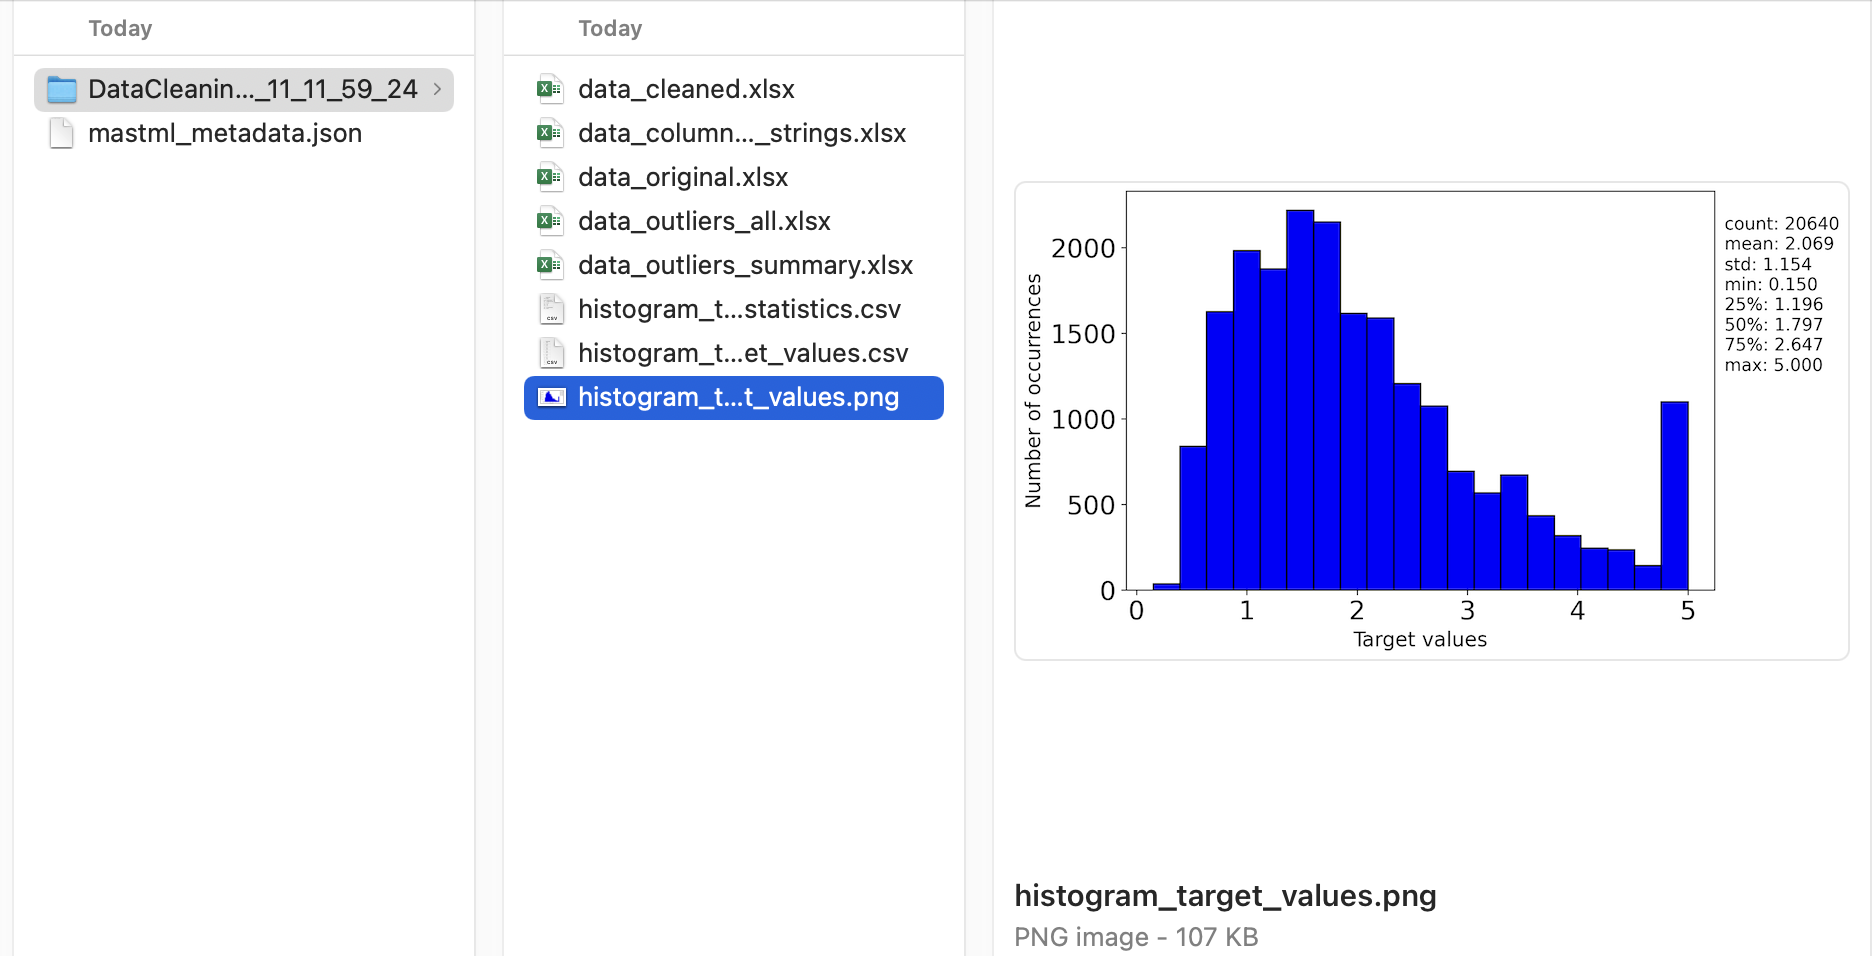

## Task 3: Import and prepare a real dataset that is stored locally  <a name="task3"></a>

Next, we want to move away from the model datasets contained in scikit-learn and learn how to import
a real materials science dataset. As part of MAST-ML, we have included a dataset in the mastml/data
folder. The data is contained there as diffusion_data_selectfeatures.xlsx. This dataset contains
calculated migration energies of solute alloys in metal host materials.

Here, we use the LocalDatasets module to load in the above mentioned diffusion dataset. 

We first need to denote the column name of the target (y-data)

In addition, there are columns in the data file not used as features or target. We need to
list them here in the parameter extra_columns

In [12]:
target = 'E_regression'

extra_columns = ['Material compositions 1', 'Material compositions 2', 'Hop activation barrier']

Here, we make an instance of our LocalDatasets class. It needs a few parameters:
   
**file_path**: where the data is stored

**target**: the column name of the y-data

**extra_columns**: list containing extra columns in the data file not used for fitting

**group_column**: column name denoting group labels (only used for LeaveOutGroup CV)
   
**testdata_columns**: column names denoting left-out data to evaluate using best
     model from CV tests. This is manual way to leave out data. Can also be done
     automatically using nested CV (we will do this in later tutorials)
   
**as_frame**: whether to return data as dataframe. Want this to be true.

We load the data with the load_data() method

In [13]:
d = LocalDatasets(file_path=data_path+'/diffusion_data_allfeatures.xlsx',
                  target=target, 
                  extra_columns=extra_columns, 
                  group_column='Material compositions 1',
                  testdata_columns=None,
                  as_frame=True)

data_dict = d.load_data()

Let's look at the contents of the loaded data_dict

We see there are 5 keys:
   
**X**: the X feature matrix (used to fit the ML model)
   
**y**: the y target data vector (true values)
   
**X_extra**: matrix of extra information not used in fitting (i.e. not part of X or y)
   
**groups**: vector of group labels (here, a list of host elements)

**X_testdata**: matrix or vector of left out data. Empty for our current example.

In [14]:
data_dict.keys()

dict_keys(['X', 'y', 'groups', 'X_extra', 'X_testdata'])

Let's assign each data object to its respective name

In [15]:
X = data_dict['X']
y = data_dict['y']
X_extra = data_dict['X_extra']
groups = data_dict['groups']
X_testdata = data_dict['X_testdata']

Let's have a look at the X feature matrix. It contains 287 elemental features.
There are a total of 408 diffusion activation barriers used for fitting

In [16]:
X

,valence_composition_average,phi_composition_average,NdValence_composition_average,MiracleRadius_composition_average,GSestFCClatcnt_composition_average,SecondIonizationEnergy_composition_average,IonizationEnergy_composition_average,n_ws^third_composition_average,ThermalConductivity_composition_average,CovalentRadius_composition_average,...,Site2_MendeleevNumber,Site2_ElasticModulus,Site2_Electronegativity,Site2_AtomicWeight,Site2_HeatFusion,Site2_SpecificHeatCapacity,Site2_AtomicRadii,Site2_ThermalExpansionCoefficient,Site2_BCCefflatcnt,Site2_AtomicVolume
0,2.0,4.350,10.0,144.0,4.027313,21.4900,731.00,1.360,429.00,145.0,...,65,80.0,1.93,107.868200,11.30,0.235,1.444,18.9,6.375951,17.075648
1,2.5,4.725,8.5,134.5,3.737485,19.2750,744.50,1.555,264.50,135.5,...,58,208.0,1.88,58.933195,16.20,0.421,1.253,13.0,5.507318,10.995861
2,4.0,4.500,7.5,137.0,3.788936,18.9950,691.90,1.545,261.35,142.0,...,49,259.0,1.66,51.996100,21.00,0.449,1.249,4.9,5.632801,12.092937
3,2.0,4.400,10.0,135.0,3.782567,20.8910,738.20,1.415,415.00,138.5,...,64,124.0,1.90,63.546000,13.60,0.385,1.278,16.5,5.617632,11.829942
4,4.0,4.640,8.0,134.5,3.764269,18.8350,745.15,1.565,254.60,138.5,...,55,211.0,1.83,55.845000,13.81,0.449,1.241,11.8,5.557847,11.777365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,4.5,3.750,3.0,150.5,4.350534,13.7250,662.00,1.525,38.20,169.5,...,47,104.0,1.60,92.906380,30.00,0.265,1.429,7.3,6.625794,18.002133
404,4.5,3.750,2.5,151.5,4.348236,6.5650,710.50,1.520,40.10,172.5,...,48,183.0,1.50,180.947880,36.57,0.140,1.430,6.3,6.618497,18.046730
405,4.0,3.625,2.0,150.0,4.291886,13.3550,659.00,1.465,22.30,167.5,...,43,110.0,1.54,47.867000,14.15,0.523,1.448,8.6,6.458833,17.636317
406,4.0,3.525,2.0,158.0,4.494239,14.0275,651.00,1.430,22.85,175.0,...,45,139.0,1.30,178.490000,27.20,0.140,1.564,5.9,7.046762,22.268711


Let's look at the groups list. The groups denote the element identity of the host metal

In [17]:
groups

0      Ag
1      Ag
2      Ag
3      Ag
4      Ag
       ..
403    Zr
404    Zr
405    Zr
406    Zr
407    Zr
Name: Material compositions 1, Length: 408, dtype: object

Let's examine the extra data not used in fitting. Note that the y-data we are 
fitting to are equal to the E_regression values listed here, minus the E_regression
value of the pure material. Material compositions 1 are the host elements, which
are the same values used in the groups list. Material compositions 2 are the solute
elements (i.e. the diffusing impurity in the host material)

In [18]:
X_extra

,Material compositions 1,Material compositions 2,Hop activation barrier
0,Ag,Ag,-0.365590
1,Ag,Co,-0.675263
2,Ag,Cr,-0.047690
3,Ag,Cu,-0.428459
4,Ag,Fe,0.081529
...,...,...,...
403,Zr,Nb,-0.478007
404,Zr,Ta,-0.054726
405,Zr,Ti,-0.022476
406,Zr,Hf,-0.104201


Finally, we can look at our manually left-out data set. For this tutorial we
have left this blank, but we will make use of it in a future tutorial

In [19]:
X_testdata

## Task 4: Download and import data from various materials databases  <a name="task4"></a>

Next, let's download some datasets from remote materials databases, then import
them for use in MAST-ML

Here, we will download a materials dataset of steel alloy yield strengths from the 
matminer datasets repository:

In [20]:
df = MatminerDatasets().download_data(name='steel_strength')

Fetching steel_strength.json.gz from https://ndownloader.figshare.com/files/13354691 to /Users/ryanjacobs/anaconda3/envs/tensorflow_env_v2/lib/python3.11/site-packages/matminer/datasets/steel_strength.json.gz


Fetching https://ndownloader.figshare.com/files/13354691 in MB: 0.016384MB [00:00,  5.14MB/s]                                                            


The output of downloading this data is a pandas dataframe. If we know which columns
correspond to X, y, X_extra, and so on, we can designate those fields here through
pandas commands. Alternatively, we can import the just-saved steel_strength.xlsx file
using the LocalDatasets class just like we did in the previous task:

In [21]:
target = 'yield strength'
extra_columns = ['formula', 'tensile strength', 'elongation']

d = LocalDatasets(file_path='steel_strength.xlsx', 
                  target=target, 
                  extra_columns=extra_columns, 
                  group_column=None,
                  testdata_columns=None,
                  as_frame=True)

# Load the data with the load_data() method
data_dict = d.load_data()

# Designate the X, y and X_extra data 
X = data_dict['X']
y = data_dict['y']
X_extra = data_dict['X_extra']

Let's have a look at the X feature matrix for this data. 
The X features are the atom fractions of different elements
in each steel alloy

In [22]:
X

,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti
0,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55
1,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00
2,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57
3,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47
4,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,0.38,0.18,0.01,7.27,0.01,3.77,0.96,0.00,0.01,4.90,0.00,0.03,0.00
308,0.00,0.06,0.05,5.15,10.20,3.20,0.01,0.00,0.01,0.01,0.00,0.03,0.09
309,0.37,0.17,0.01,5.20,0.01,5.84,1.05,0.00,0.91,4.88,0.00,0.03,0.00
310,0.41,0.19,0.01,6.99,0.01,5.84,0.92,0.00,0.01,0.02,0.00,0.03,0.00


Let's have a look at the y target data. They data are yield strengths (in MPa) for each alloy

In [23]:
y

0      2411.5
1      1123.1
2      1736.3
3      2487.3
4      2249.6
        ...  
307    1722.5
308    1019.0
309    1860.3
310    1812.1
311    1139.7
Name: yield strength, Length: 312, dtype: float64

There are many other datasets besides this steel strength dataset
available on the matminer repository. Information on these other
datasets, and the names used to query them, can be output using:

In [24]:
MatminerDatasets().get_available_datasets()

boltztrap_mp: Effective mass and thermoelectric properties of 8924 compounds in The  Materials Project database that are calculated by the BoltzTraP software package run on the GGA-PBE or GGA+U density functional theory calculation results. The properties are reported at the temperature of 300 Kelvin and the carrier concentration of 1e18 1/cm3.

brgoch_superhard_training: 2574 materials used for training regressors that predict shear and bulk modulus.

castelli_perovskites: 18,928 perovskites generated with ABX combinatorics, calculating gllbsc band gap and pbe structure, and also reporting absolute band edge positions and heat of formation.

citrine_thermal_conductivity: Thermal conductivity of 872 compounds measured experimentally and retrieved from Citrine database from various references. The reported values are measured at various temperatures of which 295 are at room temperature.

dielectric_constant: 1,056 structures with dielectric properties, calculated with DFPT-PBE.

double_

As one last example, let's look at how to download datasets that are 
hosted on Foundry-ML. More information on Foundry-ML can be found online here (https://foundry-ml.org/#/) or in the publication here (https://joss.theoj.org/papers/10.21105/joss.05467)

In [8]:
from foundry import Foundry

f = Foundry()

# Load the data here!
f.load('10.18126/uppe-p8p1', globus=False)
res = f.load_data()

Starting Download of: https://data.materialsdatafacility.org/foundry/diffusion_v1.4/Dataset_diffusion_v2.csv
Starting Download of: https://data.materialsdatafacility.org/foundry/diffusion_v1.4/.DS_Store
Starting Download of: https://data.materialsdatafacility.org/foundry/diffusion_v1.4/.ipynb_checkpoints/Foundry_dataset_upload_diffusion-checkpoint.ipynb
Downloading... 0.03 MB

A new directory /data/diffusion_v1.4/Dataset_diffusion_v2.csv has appeared. This has downloaded the same diffusion
data we used in the above example. We can view the X data (just compositions, not featurized yet), and target y data:

In [14]:
X = res['train'][0]
y = res['train'][1]

print(X, y)

    Material compositions 1 Material compositions 2
0                        Ag                      Ag
1                        Ag                      Co
2                        Ag                      Cr
3                        Ag                      Cu
4                        Ag                      Fe
..                      ...                     ...
403                      Zr                      Nb
404                      Zr                      Ta
405                      Zr                      Ti
406                      Zr                      Hf
407                      Zr                      Sn

[408 rows x 2 columns]      E_regression_shift
0              0.000000
1             -0.090142
2              0.259139
3             -0.022200
4              0.317672
..                  ...
403           -0.067020
404            0.153850
405            0.248110
406            0.204140
407            0.248040

[408 rows x 1 columns]


As with this file or other datasets downloaded
from Foundry-ML or other remote datasets, after downloading the data files
you can import them into MAST-ML using the LocalDatasets class as we 
learned in this tutorial.

There are many datasets available on Foundry-ML. You can view them with the query below, and import the desired data following
the example above

In [16]:
f.list()

,source_id,name,year,DOI
0,semiconductor_defectlevels_v1.1,Machine learning for impurity charge-state tra...,2022,10.18126/ite0-3iah
1,voyles_mdf_dmref_glasses_v2.2,Metallic Glasses and their Properties,2021,10.18126/7yg1-osf2
2,steel_strength_v1.1,Mechanical properties of some steels,2022,10.18126/524z-vd6m
3,elwood_md_v1.2,Project Elwood: MD Simulated Monomer Properties,2022,10.18126/8p6m-e135
4,foundry_moses_v1.1,Molecular Sets (MOSES): A Benchmarking Platfor...,2022,10.18126/rp13-3k3h
5,citrine_thermalconductivity_v1.2,Experimental thermal conductivity database fro...,2022,10.18126/dhmc-darr
6,training_locating_atoms_stem_images_v1.2,Training Dataset for Locating Atoms in STEM im...,2022,10.18126/qsdl-aj6x
7,mask_rcnn_defect_detection_v1.1,Mask RCNN defect detection dataset,2022,10.18126/hok0-qsa4
8,foundry_g4mp2_solvation_v1.2,DFT Estimates of Solvation Energy in Multiple ...,2022,10.18126/jos5-wj65
9,metallic_glass_database_v1.2,Quantifying the Origin of Metallic Glass Forma...,2023,10.18126/5svl-7ruk


You've now completed your second MAST-ML tutorial notebook! Now that you're more familiar with working with datasets
within MAST-ML, the next thing for us to do is look at feature engineering in more detail. 

The next example in this notebook series is titled MASTML_Tutorial_3_FeatureEngineering.ipynb, and will guide you through the process
of generating, preprocessing, and selecting features for a particular model and data split test.